In [65]:
import requests
import nltk
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
# Step 2

# Grab the UTF-8 plain text for Macbeth from the Gutenberg Project
plain_text = requests.get("https://www.gutenberg.org/ebooks/2264.txt.utf-8").text

# Create a list of stop words
stop_words = stopwords.words("english") + list(punctuation)

# Tokenize that text into words
# Lowercase all the words
words = word_tokenize(plain_text.lower())

# Remove all unwanted words
completewords = [w for w in words if w not in stop_words]

# Lemmatize the list of words
completestemmed = [WordNetLemmatizer().lemmatize(w) for w in completewords]

# Find the frequency of all words
freq = FreqDist(completestemmed)

# Turn this list into a pandas dataframe
wordlist = []
wordfreq = []
for i in sorted(freq, key=freq.get, reverse=True):
    wordlist.append(i)
    wordfreq.append(freq[i])
    
df = pd.DataFrame({'wordlist':wordlist, 'wordfreq':wordfreq})

In [43]:
df

,wordlist,wordfreq
0,'d,192
1,'s,151
2,macb,137
3,haue,122
4,thou,87
...,...,...
3761,watchfull,1
3762,producing,1
3763,butcher,1
3764,fiend-like,1


In [44]:
# Mean
df['wordfreq'].mean()

3.142857142857143

In [45]:
# Median
df['wordfreq'].median()

1.0

In [46]:
# Mode
df['wordfreq'].mode()

0    1
dtype: int64

In [47]:
# Trimmed Mean
# 3766 word frequencies, trimmed by 10 percent on both sides (total of 20 percent)
df.loc[int(0.1*3766):int(0.9*3766),'wordfreq'].mean()

1.6476443264764433

<AxesSubplot:ylabel='Frequency'>

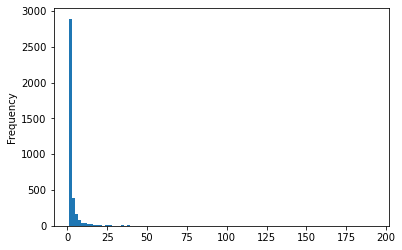

In [48]:
# Histogram of word frequencies
df['wordfreq'].plot(kind='hist',bins=100)

# Comments on the histogram

The word frequencies are heavily skewed to the right, causing the mean, median, mode, and trimmed mean to all reside in one part of the histogram, all the way to the left. It seems like a majority of the frequencies are grouped between 0 and 8 causing one extremely large bar.

In [49]:
# Standard deviation
df['wordfreq'].std()

7.809844008780195

In [50]:
df['wordfreq'].quantile(0.75)

2.0

In [51]:
df['wordfreq'].quantile(0.25)

1.0

In [52]:
# Interquartile range
df['wordfreq'].quantile(0.75) - df['wordfreq'].quantile(0.25)

1.0

# Comments on the standard deviation and the interquartile range

The standard deviation is 7.81 and yet the interquartile range is 1 which means that the standard deviation does not actually reflect where the majority of the data exists. It makes the data seem more spread than it actually is which is true if we were to look at the histogram. The majority of the data exists around a frequency of 1 to 2 as noted by the interquartile range (middle 50%) where as the standard deviation would imply that 75% is from 0 to 10 (mean + std ~= 10).

In [53]:
# Step 3

from sklearn import datasets
df = datasets.load_diabetes(as_frame=True) 
features_df = df.data
target_df = df.target

print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [54]:
# Summary statistical information of the features
features_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [55]:
# Summary statistical information of the targets
target_df.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

In [56]:
print(features_df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019908 -0.017646  
1  

In [57]:
print(target_df)

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64


In [64]:
# Finding the highest correlation coefficient

col_names = features_df.columns
max = 0
max_col = ""

for col in col_names:
    coef = np.corrcoef(features_df[col], target_df)
    if coef[0][1] > max:
        max = coef[0][1]
        max_col = col
        
print(str(max) + " " + max_col)

0.5864501344746891 bmi


Text(0, 0.5, "features_df['bmi']")

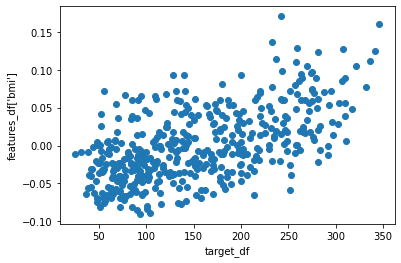

In [70]:
plt.scatter(target_df,features_df["bmi"])
plt.xlabel("target_df")
plt.ylabel("features_df['bmi']")

# Correlation coefficient

Since the correlation coefficient is positive, the variables move in the same direction causing the scatterplot to tend up and to the right.

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
# sklearn 
X = features_df[["bmi"]]
y = target_df
reg = LinearRegression().fit(X, y)
print("coefficients:")
print(reg.coef_)
print("intercept:")
print(reg.intercept_)

coefficients:
[949.43526038]
intercept:
152.1334841628967


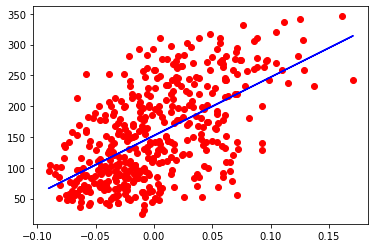

In [81]:
# Plot the linear fit
ytrain = reg.intercept_ + reg.coef_ * X
plt.plot(X,y,'ro',X,ytrain,'b-');

In [82]:
mean_squared_error(y, ytrain)

3890.4565854612724

In [83]:
r2_score(y, ytrain)

0.3439237602253803

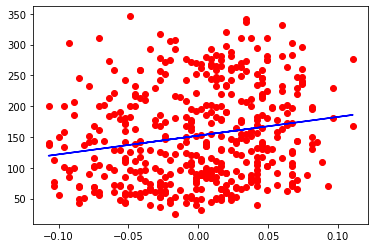

In [84]:
X = features_df[["age"]]
y = target_df
reg = LinearRegression().fit(X, y)
ytrain = reg.intercept_ + reg.coef_ * X
plt.plot(X,y,'ro',X,ytrain,'b-');

In [85]:
mean_squared_error(y, ytrain)

5720.5470172056475

In [86]:
r2_score(y, ytrain)

0.03530218264671636